# [Predicting CO2 Emissions of Vehicles]

Author: [Mickey Zhao]

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course's website. [Yes]


# Introduction

The dataset I am using is 

itertools

# Data Exploration 



In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv('CO2 Emissions.csv')

#deleting the rows that have any amount of empty variables
df=df.dropna(how='any')

# #print the first few rows of dataset to get a sense of the data
# print(df.head())

# #get a summary of the columns of numerical data
# print(df.describe())

# #get information about the dataset
# print(df.info())

# #plot histograms for the numerical data
# df.hist(figsize=(15,10))

# #plot the categorical datas into countplot
# for column in df.select_dtypes(include=['object']).columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=df, x=column)
#     plt.title(column)
#     plt.xticks(rotation=90)
#     plt.show()


# Data Preprocessing 


After taking a brief look at the data, I noticed that some of the information does not provide much help. Therefore, I am dropping the Make, Model, Vehicle class, as well as Transmission. These data are not directly related to CO2 emission. I will also be deleting the Fuel Consumption Comb (mpg), as it is simply the same as Fuel Consumption Comb (L/100km) but in a different unit. Therefore, I will delete these two columns from the dataset. 

Then, I will rename some of the columns as some of the names are too long and not useful for displaying. I have changed Fuel Consumption City to Fuel City, Fuel Consumption Hwy to Fuel Hwy, and Fuel Consumption Comb to Fuel Comb

I will also be renaming the letters under Fuel Type to the actual fuel type they represent, so it is easier to understand.

Lastly, I will scale the numerical columns with standardization to make sure they are all on the same scale so they are compariable.

   Engine Size(L)  Cylinders    Fuel Type  Fuel City  Fuel Hwy  Fuel Comb  \
0       -0.856721  -0.883408  Premium Gas  -0.759002 -1.052781  -0.855742   
1       -0.561317  -0.883408  Premium Gas  -0.387577 -0.603202  -0.475423   
2       -1.225976  -0.883408  Premium Gas  -1.873275 -1.457401  -1.754677   
3        0.251043   0.210575  Premium Gas   0.040990  0.026208   0.043193   
4        0.251043   0.210575  Premium Gas  -0.130437 -0.153624  -0.129679   

   CO2 Emissions(g/km)  
0            -0.932933  
1            -0.505646  
2            -1.958421  
3             0.075464  
4            -0.112542  
       Engine Size(L)    Cylinders     Fuel City      Fuel Hwy     Fuel Comb  \
count    7.385000e+03  7385.000000  7.385000e+03  7.385000e+03  7.385000e+03   
mean     2.963401e-16     0.000000  2.232172e-16 -9.621432e-18  1.539429e-17   
std      1.000068e+00     1.000068  1.000068e+00  1.000068e+00  1.000068e+00   
min     -1.669081e+00    -1.430399 -2.387556e+00 -2.266643e+00 -2.3

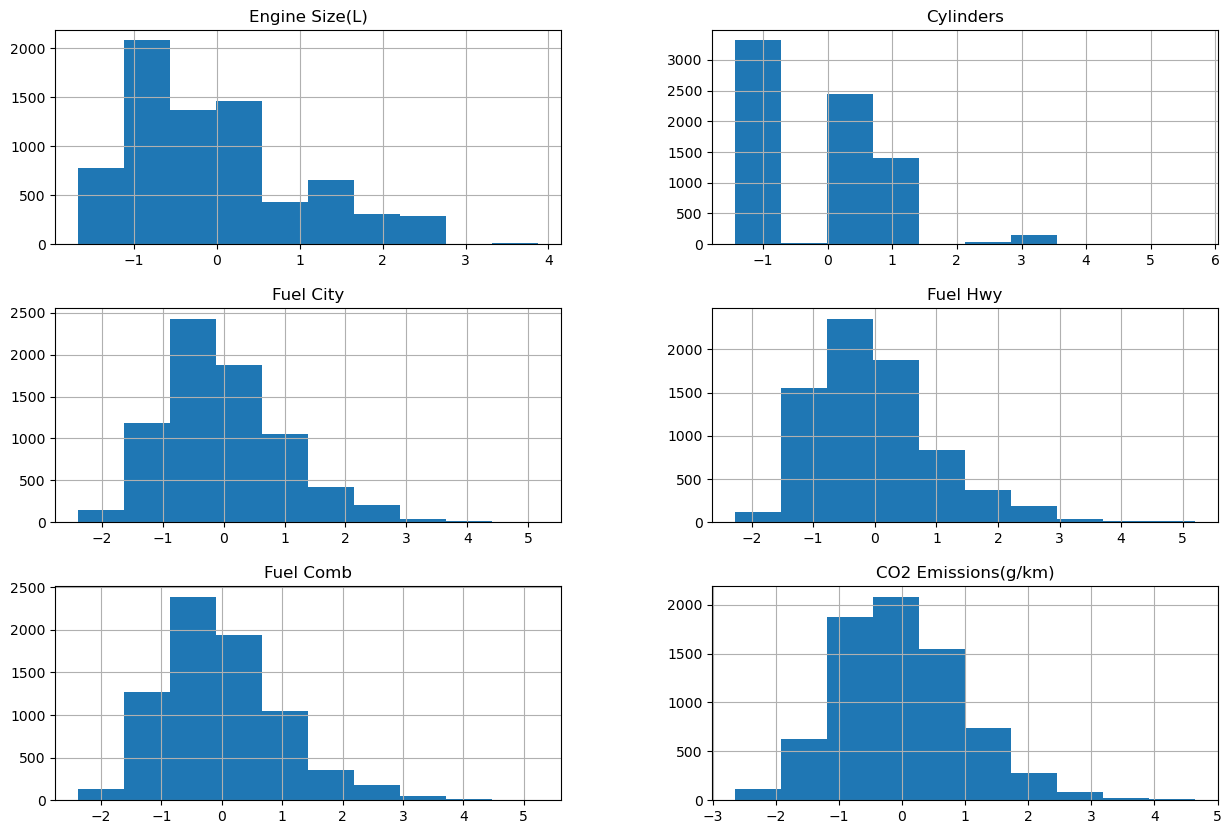

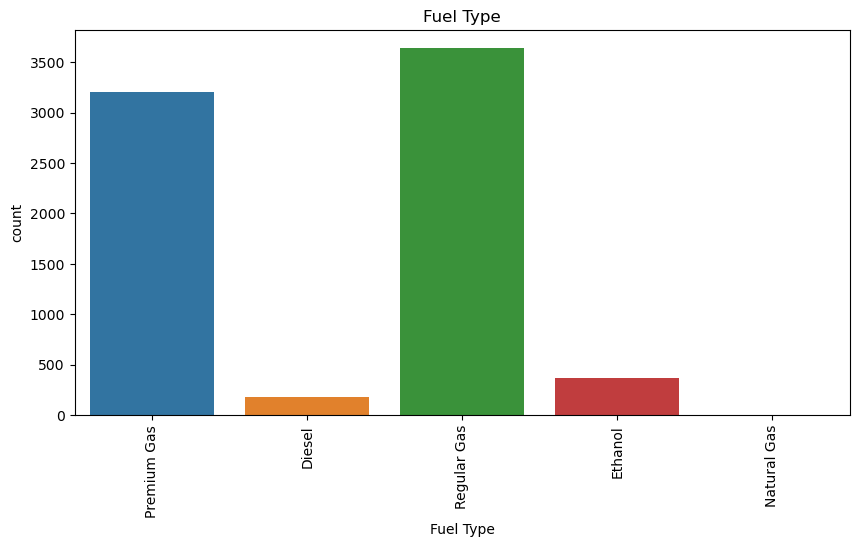

In [62]:
from sklearn.preprocessing import StandardScaler


#drop the (Model) and (Fuel Consumption Comb mpg) columns of data from the dataset
df = df.drop(['Make','Model','Vehicle Class', 'Transmission', 'Fuel Consumption Comb (mpg)'], axis=1)

#Rename some of the columns for earier readability
df = df.rename(columns={'Fuel Consumption City (L/100 km)':'Fuel City', 'Fuel Consumption Hwy (L/100 km)':'Fuel Hwy', 'Fuel Consumption Comb (L/100 km)':'Fuel Comb'})

#renaming values under Fuel Type
df['Fuel Type'] = df['Fuel Type'].replace('X', 'Regular Gas')
df['Fuel Type'] = df['Fuel Type'].replace('Z', 'Premium Gas')
df['Fuel Type'] = df['Fuel Type'].replace('D', 'Diesel')
df['Fuel Type'] = df['Fuel Type'].replace('E', 'Ethanol')
df['Fuel Type'] = df['Fuel Type'].replace('N', 'Natural Gas')


#scale the numerical columns with standardization
scaler = StandardScaler()
numerical = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical] = scaler.fit_transform(df[numerical])

#Visualizing the processed dataset
print(df.head())

#get a summary of the columns of numerical data
print(df.describe())

#get information about the dataset
print(df.info())

#plot histograms for the numerical data
df.hist(figsize=(15,10))

#plot the categorical datas into countplot
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()



# Feature Selection

Here I want to see which feature/collection of features are the most correlated with CO2 emission. I first created dummy variables to make use of the categorical data of Fuel type, then went on to compute the R^2 value and determine which features to use later on.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from itertools import combinations

# Create dummy variables for Premium Gas and Regular Gas
df['isPremiumGas'] = (df['Fuel Type'] == 'Premium Gas').astype(int)
df['isRegularGas'] = (df['Fuel Type'] == 'Regular Gas').astype(int)

#drop the original fueltype column
df = df.drop('Fuel Type', axis=1)

model = LinearRegression()
r2_values = []

#compte the R^2 Value for each feature
for col in df.columns:
    if col != 'CO2 Emissions(g/km)':
        model.fit(df[[col]], df['CO2 Emissions(g/km)'])
        pred = model.predict(df[[col]])
        r2 = r2_score(df['CO2 Emissions(g/km)'], pred)
        print(f"R^2 value for {col}: {r2}")
        r2_values.append((r2, [column]))

#compute the R^2 values for all combinations of features.
for i in range(2, len(df.columns)):
    for subset in combinations(df.columns, i):
        if 'CO2 Emissions(g/km)' not in subset:
            model.fit(df[list(subset)], df['CO2 Emissions(g/km)'])
            pred = model.predict(df[list(subset)])
            r2 = r2_score(df['CO2 Emissions(g/km)'], pred)
            print(f"R^2 value for {subset}: {r2}")
            r2_values.append((r2, list(subset)))
    
#find and print the highest R^2 value and its feature/features
maxr2, features = max(r2_values, key=lambda x: x[0])
print()
print(f"The highest R^2 value is {maxr2} with the features {features}")

R^2 value for Engine Size(L): 0.724447204652408
R^2 value for Cylinders: 0.6932953649936135
R^2 value for Fuel City: 0.8456503198972762
R^2 value for Fuel Hwy: 0.7806357669286315
R^2 value for Fuel Comb: 0.8428186895623989
R^2 value for isPremiumGas: 0.053436609700923454
R^2 value for isRegularGas: 0.06779898089491276
R^2 value for ('Engine Size(L)', 'Cylinders'): 0.7377528816900287
R^2 value for ('Engine Size(L)', 'Fuel City'): 0.8699441320331145
R^2 value for ('Engine Size(L)', 'Fuel Hwy'): 0.8563219686877784
R^2 value for ('Engine Size(L)', 'Fuel Comb'): 0.8735316040065462
R^2 value for ('Engine Size(L)', 'isPremiumGas'): 0.729900934577502
R^2 value for ('Engine Size(L)', 'isRegularGas'): 0.7281953871094475
R^2 value for ('Cylinders', 'Fuel City'): 0.8715042331508964
R^2 value for ('Cylinders', 'Fuel Hwy'): 0.8631018084716602
R^2 value for ('Cylinders', 'Fuel Comb'): 0.8772970198353781
R^2 value for ('Cylinders', 'isPremiumGas'): 0.6932953771687405
R^2 value for ('Cylinders', 'isReg

# Model Building 

After the previous part, we can see that by using all 7 features gives us the highest R^2 value. Which means we should use all 7 features to build our model. 

I am splitting the data into a simple training and testing set, with the size of the testing set = 20% of the total data. I am not using the k-fold method because the data contains 7385 rows and I think using a simple train-test split is sufficient. However, if we want to ensure the model's performance really is not dependent on the way the data is split, we could simply implement a k-fold cross validation like what we did in the homework. (I set the random_state=5 for reproducibility but I ran a lot of tests with it being completely random and found out that the MSE and R^2 values did not vary a lot, which is why I think using a simple train test split is sufficient)

I am using a Linear Regression model and computing the Mean Squared Error as well as R^2 score by comparing the predictions to the actual value of CO2 emissions.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('CO2 Emissions(g/km)', axis=1)
y = df['CO2 Emissions(g/km)']

#split the data into training and testing sets (setting a random_state so we can reproduce the results, for an accurate model we would set it to completely random)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LinearRegression()

#train the model
model.fit(X_train, y_train)

#using the testing data to predict
ypred = model.predict(X_test)

#calculate Mean squared error
mse = mean_squared_error(y_test, ypred)
print("Mean Squared Error:", mse)

#calculated R^2 score
r2 = r2_score(y_test, ypred)
print("R^2 Score:", r2)



Mean Squared Error: 0.0809956732770324
R^2 Score: 0.9163641899489641


# Model Improvement 

From the previous part, we can see that the Linear Regression model has a MSE of 0.080996 and a R^2 value of 0.916264. MSE is a measure of the average squared difference between the model's predictions and the actual values, with a lower value indicating a better model performance. The R^2 value is a measure of how well the model's predictions fit the actual values, with a higher value (values closer to 1) indicating a better model performance. The MSE value is quite low and the R^2 value is quite high, suggesting that the model is performing well at predicting CO2 emissions based on the features (Engine Size, Cylinders, Fuel City, Fuel Hwy, Fuel Comb, IsPremiumGas, isRegularGas)

To improve the model, I am trying to use Ridge and Lasso regression models and cross validation.

In [96]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

ridge = Ridge()
lasso = Lasso()

# ridge regression
ridge.fit(X_train, y_train)
scores = cross_val_score(ridge, X, y, cv=5)
print("Ridge Regression Cross-Validated R^2 Scores:", scores)
print("Mean R^2:", np.mean(scores))

#Lasso regression
lasso.fit(X_train, y_train)
scores = cross_val_score(lasso, X, y, cv=5)
print("Lasso Regression Cross-Validated R^2 Scores:", scores)
print("Mean R^2:", np.mean(scores))

Ridge Regression Cross-Validated R^2 Scores: [0.88948323 0.91617298 0.93654668 0.90131837 0.9283508 ]
Mean R^2: 0.9143744133744344
Lasso Regression Cross-Validated R^2 Scores: [-0.01256932 -0.00734865 -0.00390721 -0.00532579 -0.00173666]
Mean R^2: -0.006177525224785807


Looking at the results, the R^2 score for Ridge regression is quite high, indicating that it is a good fit.

On the other hand, we got a negative value for the r^2 value of Lasso regression. A negative R^2 score is possible to produce, because the model is split separately into training and testing data. It indicates that our model had a very poor fit. 

# Conclusion 

Looking at our results, it seems that both Linear Regression and Ridge Regression are a good fit for our model, as indicated by the high R^2 values. It suggest that both these models are capable of predicting the CO2 emissions based on the features (Engine Size, Cylinders, Fuel City, Fuel Hwy, Fuel Comb, IsPremiumGas, isRegularGas)

However, the bias-variance tradeoff shouldn't be overlooked. The bias-variance tradeoff is a fundamental concept in machine learning. It refers to the balance between bias and variance when we are building a model. A model with a high bias makes very strong assumptions about the data and tends to have an underfitting effect, while a higher variance pays more attention to training the data and tends to have an overfitting effect. 

Looking at our results aboce, the Linear Regression model might have a high bias if it is oversimplifying the problem and not capturing all the patterns in the data. On the other hand, the Ridge regression might have a high variance if it is overcomplicating the problem and fitting too closely to the training data. By using cross-validation and regularization (which Ridge and Lasso provide), we can achieve a good balance between bias and variance and improve the model’s performance.

Considering the bias-variance tradeoff effect, the Ridge Regression model will be a good fit if future datasets is prone to fluctuations or if it is likely to be more complex data. However, if the dataset is stable, then the Linear Regression Model will be a good fit. Although Linear Regression model had a slightly higher R^2 value, it does not necessarily indicate that it performs well to unseen data. 

# References

sklearn Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression

sklearn Train Test Split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

sklearn cross val score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Negative R^2 Score: https://towardsdatascience.com/explaining-negative-r-squared-17894ca26321

Bias and Variance Tradeoff: https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/